# Brexit Polarity Tweets - Text Classification

## Setup

In [1]:
# Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML Tools
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import recall_score, roc_auc_score

# ML Models
from xgboost import XGBClassifier

import tensorflow as tf
from scikeras.wrappers import KerasClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# settings
N_ROWS     = 1_000 # `None` to import all rows
TEST_SPLIT = 0.2
PATH_DATA  = "./data/"

# paths to raw data
PATH_ANTI  = PATH_DATA + 'raw/TweetDataset_AntiBrexit_Jan-Mar2022.csv'
PATH_PRO   = PATH_DATA + 'raw/TweetDataset_ProBrexit_Jan-Mar2022.csv'

# paths to processed data
PATH_TARGETS      = PATH_DATA + "preprocessed/targets.csv"
PATH_TWEETS_RAW   = PATH_DATA + "preprocessed/tweets_raw.csv"
PATH_TWEETS_TOKEN = PATH_DATA + "preprocessed/tweets_token.csv"

# paths to extracted features
PATH_X_TRAIN = PATH_DATA + "features/X_train.csv"
PATH_X_TEST  = PATH_DATA + "features/X_test.csv"
PATH_Y_TRAIN = PATH_DATA + "features/y_train.csv"
PATH_Y_TEST  = PATH_DATA + "features/y_test.csv"

## Import Data

In [3]:
X_train = pd.read_csv(PATH_X_TRAIN)
X_test  = pd.read_csv(PATH_X_TEST)

y_train = pd.read_csv(PATH_Y_TRAIN).values.flatten()
y_test  = pd.read_csv(PATH_Y_TEST).values.flatten()

## Baseline Model

In [4]:
baseline_cols = [
    'sentiment_compound', 
    'sentiment_positive',
    'sentiment_negative',
    'sentiment_neutral'
]

In [5]:
# fit baseline model
baseline = LogisticRegression()
baseline.fit(X_train[baseline_cols], y_train)

# evaluate baseline model
y_pred = baseline.predict(X_test[baseline_cols])
accuracy_score(y_test, y_pred)

0.601010101010101

## Feature Selection

## Model Selection

In [6]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

In [7]:
# a dictionary to store each algorithm performance
cv_scores = {}

for model in models:
    score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs = -1)
    cv_scores[model.__class__.__name__] = np.mean(score)

In [8]:
model_names = np.array(list(cv_scores.keys()))
model_scores = np.array([np.mean(scores) for scores in cv_scores.values()])

In [9]:
model_scores_percent = list(map(lambda x: f"{x*100:.2f} %", model_scores))

pd.DataFrame({"Model Name": model_names, "Score": model_scores_percent}) \
    .sort_values(by = 'Score', ascending = False) \
    .reset_index(drop = True)

,Model Name,Score
0,RandomForestClassifier,74.56 %
1,XGBClassifier,74.30 %
2,GradientBoostingClassifier,72.78 %
3,AdaBoostClassifier,72.15 %
4,KNeighborsClassifier,72.03 %
5,LogisticRegression,60.38 %


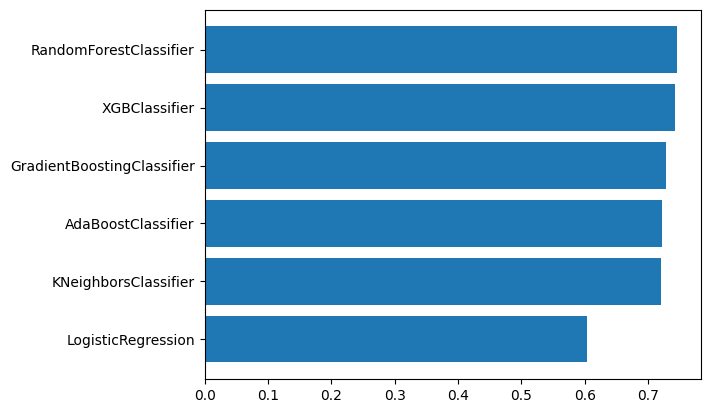

In [10]:
sorting_index = np.argsort(model_scores)

plt.barh(y = model_names[sorting_index], width = model_scores[sorting_index])
plt.show()

## Hyperparameter Tuning

## Model Evaluation